In [94]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [95]:
class AgentState(TypedDict):
    number1: int
    number2: int
    sum_num: int
    

In [ ]:

def sub_node(state: AgentState) -> AgentState:
    state['sum_num'] = state['sum_num'] - state['number1'] - state['number2']
    return state

def random_node(state: AgentState) -> str:
    if state['sum_num'] >0:
        return 'loop_sub_node'
    else:
        return "end"

In [97]:
graph = StateGraph(AgentState)
graph.add_node('sub_node', sub_node)
# random_node 不应该被添加为节点，因为它是一个条件函数
# graph.add_node('random_node', random_node)

graph.add_edge(START, 'sub_node')

# 将条件边的起点从 'random_node' 改为 'sub_node'
# 在 sub_node 执行完毕后，调用 random_node 函数来决定下一个走向
graph.add_conditional_edges(
    'sub_node',  # 条件判断的起点
    random_node, # 判断函数
    {
        "loop_sub_node": "sub_node", # 如果返回 "sub_node"，则再次调用 sub_node
        "end": END              # 如果返回 "end"，则结束
    }
)
app = graph.compile()

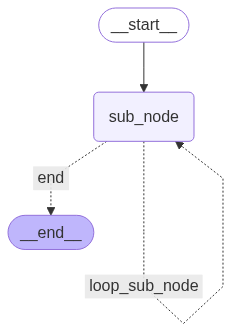

In [98]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [99]:
require = app.invoke({"number1": 1, "number2": 2,"sum_num":10})
print(require)

{'number1': 1, 'number2': 2, 'sum_num': -2}


## guess number game

In [54]:
from langgraph.graph import END, StateGraph,START
from typing import TypedDict
import random

In [60]:
class AgentState(TypedDict):
    guess_number:int
    user_input:int
    system_feeback:str
    attempts:int
    low:int
    high:int
    user_name:str
    result:str

    

In [72]:
def setup(state: AgentState) -> AgentState:
    state["guess_number"] = random.randint(state["low"], state["high"])
    state["attempts"] = 0
    state["system_feeback"] = "game start"
    print("game start")
    return state

def guess(state: AgentState) -> AgentState:
    state["user_input"] = int(input("guess a number: "))
    if state["attempts"] >= 10:
        state["system_feeback"] = "you lose"
        state["result"] = f"sorr {state['user_name']} you lose, the number is {state['guess_number']}, you have {state['attempts']} attempts"
        print(state["result"])
        return state
    elif state["user_input"] == state["guess_number"]:
        state["system_feeback"] = "you win"
        state["result"] = f"congratulations {state['user_name']} you win, the number is {state['guess_number']}, you have {state['attempts']} attempts"
        print(state["result"])
        return state
    elif state["user_input"] < state["guess_number"]:
        state["system_feeback"] = f"{state['user_input']} is too small"
        print(state["system_feeback"])
        state["attempts"] += 1
        return state
    elif state["user_input"] > state["guess_number"]:
        state["system_feeback"] = f"{state['user_input']} is too big"
        print(state["system_feeback"])
        state["attempts"] += 1
        return state

def loop(state: AgentState) -> AgentState:
    if state["system_feeback"] == "you win" or state["system_feeback"] == "you lose":
        return "end"
    else:
        return "guess"
    


In [76]:

graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess",guess)
# graph.add_node("loop_guess",lambda state: state)
graph.add_edge(START,"setup")
graph.add_edge("setup","guess")
# graph.add_edge("guess","loop_guess")
# graph.add_conditional_edges("loop_guess",loop,{"guess":"guess","end":END})
graph.add_conditional_edges("guess",loop,{"guess":"guess","end":END})

app=graph.compile()



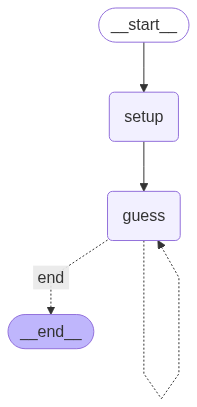

In [77]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [71]:
result = app.invoke({"user_name": "John","low": 1,"high": 100})

game start
50 is too big
30 is too small
40 is too small
45 is too small
48 is too big
congratulations John you win, the number is 46, you have 5 attempts
